# **Introduction: Data and Problem summary**

## Problem domain

We are two marketing data scientists working for a cosmetic company.

This year, our company has 100k dollar as our online advertising budget. 

Our job is to increase our click through rate (CTR) of Ads. Click-through rate is the ratio of users who click the ads to the number of total users who view them. It is commonly used to measure the success of an online advertising campaign.

Why we want to increase CTR?

BY increasing CTR, we can increase Ads conversion revenue and optimize Ads spending.

Till 2021, the total digital ad spending in the ad displaying segment reached roughly 250 billion. This is a substantial number, meaning that any improvement in increasing the targeting accuracy would make a huge impact. The more accurate the prediction of whether a user will click or not, the more cost is saved for advertisers. The current benchmark for average cost per thousand impressions is $3.12 on Google’s Display network and on average the current click-through rate is 0.35% for display ads. 


### Methods

Type of learning:

Supervised-learning Algorithm: Classification

P(T, E+ ΔE) > P(T,E) 


T: Decision Tree, Random Forest, and XGBoost
E: The population baseline precision is 17% 
P: Accuracy, Recall, and Precision 


### Assumptions

Here are some assumptions about our projects:

Budget: 100k USD as our advertising budget. 

Average CPM: $3.12 Cost per thousand impressions (CPM)  
So by spending 100k USD, we could reach out to 31.3 million people to watch our ads (3.12/ 1000 show >> 0.003/ show)

Our revenue per customer (total revenue/number of customers): 100 USD

Conversion rate (click to purchase): 0.4% (get from Google Ads).

Finally, based on our model, we have a precision value: it represents the ratio of people who click the ads to people we reach out. Using these attributes, we calculate relevant business value of our ML model.



## Key Findings & Main takeaways

### Business value of our project

By increasing the precision from 17% to 26%, 

1. we optimize the use of our advertising budget by increasing the number of potential customers we reach out to by 53%.

`Number of potential customers we reach out to (million) = precision * total impressions (31.3 million)`

Baseline precision: 17% (the ratio of people who click the ads to total population in our dataset)

Before prediction, we could reach out to 5.32 million potential customers 

XGboost precision: 26%

After prediction, we could reach out to 8.1 million potential customers




2. we also increase Ad revenue.

`Revenue (million) 
= number of potential customers we reach out to * conversion rate * revenue per customer
`

Revenue before prediction: 5.32 * 0.4% * 100 = 2.1 million
Revenue after prediction: 8.1  * 0.4% * 100 = 3.24 million, increase 1.14 million annually, 52%!



### Model comparision

We use classification algorithm to make prediction.

Performance: XGBoost > Random Forest > Decision Trees

We choose XGBoost: Good Precision & Highest Recall

# **Section 1: Exploratory Data Analysis**

Link to Dataset: https://www.kaggle.com/competitions/avazu-ctr-prediction/overview


This is an open data source on Kaggle provided by Avazu.
It comes with a training set and testing set both in csv file format. The data set consists of 10 days of click-through data, ordered chronologically.

"Click" is our outcome variable, and other independent attributes are all catogarical data.

Data fields:

id: ad identifier

**click: 0/1 for non-click/click**

hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.

C1 -- anonymized categorical variable

banner_pos

site_id

site_domain

site_category

app_id

app_domain

app_category

device_id

device_ip

device_model

device_type

device_conn_type

C14-C21 -- anonymized categorical variables

In [ ]:
import pandas as pd
import os
from sys import platform
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pickle
import seaborn as sns

Because the number of rows of the file is too large (over 40 million), Pandas DataFrame cannot read such a large amount of data. So we read 1 million each time, randomly sample 0.05% of the data from each batch data, and integrate them to a new train set.

In [ ]:
#import dataset from google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
chunksize = 10 ** 6
num_of_chunk = 0
df_raw = pd.DataFrame()
    
for chunk in pd.read_csv('train.txt', chunksize=chunksize, sep=','):
    num_of_chunk += 1
    df_raw = pd.concat([df_raw, chunk.sample(frac=0.005, replace=False, random_state=123)], axis=0)

df_raw.reset_index(inplace=True)


In [ ]:
df_raw.head()

In [ ]:
df = df_raw

<bound method DataFrame.info of            index            id  click      hour    C1  banner_pos   site_id  \
0         373315  2.754752e+18      1  14102102  1005           1  d9750ee7   
1         459286  9.630799e+18      0  14102102  1005           0  1fbe01fe   
2         262398  1.048226e+19      0  14102102  1005           0  1fbe01fe   
3         789396  1.830856e+19      0  14102104  1005           1  b8eae5f9   
4         383229  3.559389e+18      0  14102102  1005           0  1fbe01fe   
...          ...           ...    ...       ...   ...         ...       ...   
202140  40396353  3.507535e+18      0  14103023  1005           0  85f751fd   
202141  40350497  1.099992e+19      0  14103023  1005           0  85f751fd   
202142  40041442  1.308380e+19      0  14103020  1005           0  9fe0fa9b   
202143  40274554  1.499525e+19      0  14103022  1005           0  f4959604   
202144  40299230  2.455823e+18      0  14103022  1005           0  85f751fd   

       site_domain 

### Handling Null Values

In [ ]:
# Check if there are any null value
df.isna().sum()

index               0
id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

### Handling Duplicates

In [ ]:
print('Before dropping duplicates', len(df))
# drop duplicates
df.drop_duplicates(inplace=True)
print('After dropping duplicates', len(df))

Before dropping duplicates 202145
After dropping duplicates 202145


### Handling Data type

In [ ]:
df.describe()

,index,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,2.021450e+05,2.021450e+05,202145.000000,2.021450e+05,202145.000000,202145.000000,202145.000000,202145.000000,202145.000000,202145.000000,202145.000000,202145.000000,202145.000000,202145.000000,202145.000000,202145.000000
mean,2.021055e+07,9.236467e+18,0.170422,1.410256e+07,1004.970051,0.288224,1.015989,0.331777,18846.210354,318.925346,60.037646,2113.248065,1.432457,227.522753,53210.794806,83.388949
std,1.167092e+07,5.322693e+18,0.376004,2.967080e+02,1.100846,0.507738,0.530308,0.855467,4968.664731,21.643667,47.418936,610.141964,1.326707,351.603053,49957.375455,70.350495
min,1.460000e+02,2.574744e+13,0.000000,1.410210e+07,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000
25%,1.010667e+07,4.628284e+18,0.000000,1.410230e+07,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000
50%,2.021121e+07,9.257646e+18,0.000000,1.410260e+07,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100048.000000,61.000000
75%,3.032220e+07,1.385056e+19,0.000000,1.410281e+07,1005.000000,1.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100094.000000,102.000000
max,4.042890e+07,1.844664e+19,1.000000,1.410302e+07,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000


In [ ]:
#index and id are meaningless here
df = df.drop(['index', 'id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202145 entries, 0 to 202144
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   click             202145 non-null  int64 
 1   hour              202145 non-null  int64 
 2   C1                202145 non-null  int64 
 3   banner_pos        202145 non-null  int64 
 4   site_id           202145 non-null  object
 5   site_domain       202145 non-null  object
 6   site_category     202145 non-null  object
 7   app_id            202145 non-null  object
 8   app_domain        202145 non-null  object
 9   app_category      202145 non-null  object
 10  device_id         202145 non-null  object
 11  device_ip         202145 non-null  object
 12  device_model      202145 non-null  object
 13  device_type       202145 non-null  int64 
 14  device_conn_type  202145 non-null  int64 
 15  C14               202145 non-null  int64 
 16  C15               202145 non-null  int

Considering that the purpose of this forecast is the click rate, the year, month and date are meaningless, but the weekday is theoretically meaningful. So convert the date in the original hour feature to weekday.

Also, the time of day is theoretically meaningful according to each person's different living habits. To avoid too many variables, the hour is divided into 12 periods, one for every two hours.

In [ ]:
def get_date(hour):
    '''
    Create a function that converts hour data to date format
    '''
    y = '20'+str(hour)[:2]
    m = str(hour)[2:4]
    d = str(hour)[4:6]
    return y+'-'+m+'-'+d

# Create a weekday field, convert the hour and fill it in
df['weekday'] = pd.to_datetime(df.hour.apply(get_date)).dt.dayofweek.astype(str)

def tran_hour(x):
    '''
    Create a function that converts hour data into time periods
    '''
    x = x % 100
    while x in [23,0]:
        return '23-01'
    while x in [1,2]:
        return '01-03'
    while x in [3,4]:
        return '03-05'
    while x in [5,6]:
        return '05-07'
    while x in [7,8]:
        return '07-09'
    while x in [9,10]:
        return '09-11'
    while x in [11,12]:
        return '11-13'
    while x in [13,14]:
        return '13-15'
    while x in [15,16]:
        return '15-17'
    while x in [17,18]:
        return '17-19'
    while x in [19,20]:
        return '19-21'
    while x in [21,22]:
        return '21-23'

# Convert hour to period
df['hour'] = df.hour.apply(tran_hour)


In [ ]:
need_tran_feature = df.columns[2:4].tolist() + df.columns[13:23].tolist()
need_tran_feature
 
# Convert variables to object type sequentially
for i in need_tran_feature:
    df[i] = df[i].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202145 entries, 0 to 202144
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   click             202145 non-null  int64 
 1   hour              202145 non-null  object
 2   C1                202145 non-null  object
 3   banner_pos        202145 non-null  object
 4   site_id           202145 non-null  object
 5   site_domain       202145 non-null  object
 6   site_category     202145 non-null  object
 7   app_id            202145 non-null  object
 8   app_domain        202145 non-null  object
 9   app_category      202145 non-null  object
 10  device_id         202145 non-null  object
 11  device_ip         202145 non-null  object
 12  device_model      202145 non-null  object
 13  device_type       202145 non-null  object
 14  device_conn_type  202145 non-null  object
 15  C14               202145 non-null  object
 16  C15               202145 non-null  obj

### Clean Data 

In [ ]:
#Confirm the value count of each feature
len_of_feature_count = []
for i in df.columns[2:23].tolist():
    print(i, ':', len(df[i].astype(str).value_counts()))
    len_of_feature_count.append(len(df[i].astype(str).value_counts()))

C1 : 7
banner_pos : 7
site_id : 1807
site_domain : 1719
site_category : 19
app_id : 1756
app_domain : 112
app_category : 20
device_id : 33522
device_ip : 144980
device_model : 3776
device_type : 4
device_conn_type : 4
C14 : 1905
C15 : 8
C16 : 9
C17 : 410
C18 : 4
C19 : 63
C20 : 160
C21 : 60


The value count of some features is extremely high, even with millions of data values, in which case one-hot encoding cannot be performed. Here, the value count of each feature is limited to 10, and once more than 10 values, the reduction operation will be performed.

The method of reduction is to calculate the CTR (clickthrough rate) of all the categories of a variable, and label the categories with five levels based on the value of CTR, such as very_high, higher, mid, lower, very_low, etc.

In [ ]:
obj_features = []

for i in range(len(len_of_feature_count)):
    if len_of_feature_count[i] > 10:
        obj_features.append(df.columns[2:23].tolist()[i])
obj_features

['site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'C14',
 'C17',
 'C19',
 'C20',
 'C21']

In [ ]:
df_describe = df.describe()
df_describe

,click
count,202145.000000
mean,0.170422
std,0.376004
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
def obj_clean(X):
    # clean by each feature
    
    def get_click_rate(x):
        '''
        This function calculate the CTR
        '''
        temp = df[df[X.columns[0]] == x]
        res = round((temp.click.sum() / temp.click.count()),3)
        return res

    def get_type(V, str):
        '''
        This function categorize instances into different buckets by the click rate and return the index
        in each bucket 
        '''
        very_high = df_describe.loc['mean','click'] + 0.04
        higher = df_describe.loc['mean','click'] + 0.02
        lower = df_describe.loc['mean','click'] - 0.02
        very_low = df_describe.loc['mean','click'] - 0.04

        # keep record of the index of the values that are categorize in respective
        vh_type = V[V[str] > very_high].index.tolist()
        hr_type = V[(V[str] > higher) & (V[str] < very_high)].index.tolist()
        vl_type = V[V[str] < very_low].index.tolist()
        lr_type = V[(V[str] < lower) & (V[str] > very_low)].index.tolist()

        return vh_type, hr_type, vl_type, lr_type

    def clean_function(x):
        '''
        This function categorize the values into bucket and return as string
        '''
        while x in type_[0]:
            return 'very_high'
        while x in type_[1]:
            return 'higher'
        while x in type_[2]:
            return 'very_low'
        while x in type_[3]:
            return 'lower'
        return 'mid'
        
    print('Run: ', X.columns[0])
    fq = X[X.columns[0]].value_counts()
    # Here we keep record of the frequency of each instances. Also, in order to increase efficiency, we only keep the 
    # instances in top 1000 frequency
    if len(fq) > 1000:
        fq = fq[:1000]

    # Store frequency in a dataframe and keep record of the index
    fq = pd.DataFrame(fq)
    fq['new_column'] = fq.index    

    # Use index to call get_click_rate function and get the click rate of each instance
    fq['click_rate'] = fq.new_column.apply(get_click_rate)

    # call get_type function to categorize them into frequency buckets
    type_ = get_type(fq, 'click_rate')

    return X[X.columns[0]].apply(clean_function)

In [ ]:
# loop through the object features that have to be transformed
for feature in obj_features:    
    df[[feature]] = pd.DataFrame(obj_clean(df[[feature]]))

df

Run:  site_id
Run:  site_domain
Run:  site_category
Run:  app_id
Run:  app_domain
Run:  app_category
Run:  device_id
Run:  device_ip
Run:  device_model
Run:  C14
Run:  C17
Run:  C19
Run:  C20
Run:  C21


,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday
0,1,01-03,1005,1,very_high,very_high,mid,higher,higher,higher,...,0,very_high,320,50,very_high,2,very_high,higher,very_high,1
1,0,01-03,1005,0,higher,higher,very_high,higher,higher,higher,...,0,higher,320,50,higher,0,mid,higher,higher,1
2,0,01-03,1005,0,higher,higher,very_high,higher,higher,higher,...,0,higher,320,50,higher,0,mid,higher,higher,1
3,0,03-05,1005,1,very_low,very_low,mid,higher,higher,higher,...,0,lower,320,50,very_low,3,mid,mid,very_high,1
4,0,01-03,1005,0,higher,higher,very_high,higher,higher,higher,...,0,very_high,320,50,higher,0,mid,higher,higher,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202140,0,23-01,1005,0,very_low,very_low,very_low,very_high,lower,very_high,...,0,higher,320,50,very_high,0,mid,higher,mid,3
202141,0,23-01,1005,0,very_low,very_low,very_low,very_low,lower,very_low,...,2,mid,320,50,lower,0,very_low,very_low,mid,3
202142,0,19-21,1005,0,very_low,very_low,mid,higher,higher,higher,...,0,very_low,320,50,very_low,3,mid,higher,very_low,3
202143,0,21-23,1005,0,very_low,very_low,mid,higher,higher,higher,...,0,mid,320,50,very_low,0,very_low,lower,very_low,3


After we transform these attributes, we want to know which attrbutes we want to keep in our dataset to do further predictions. So we plot bar plots by features on click counts:

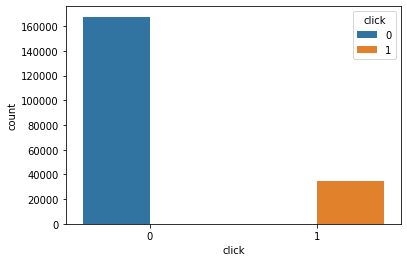

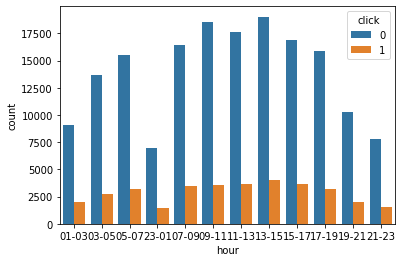

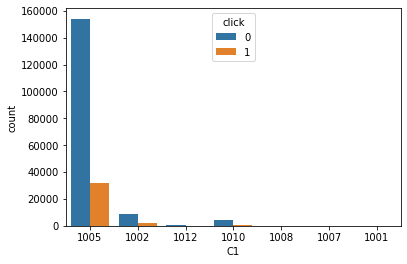

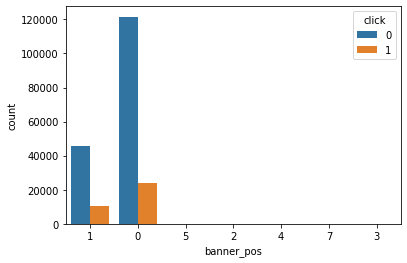

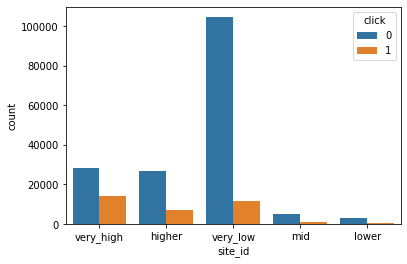

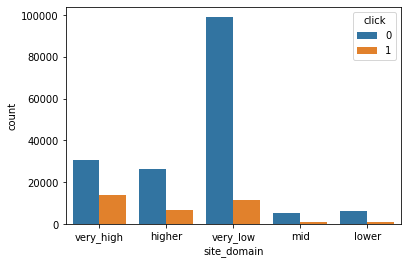

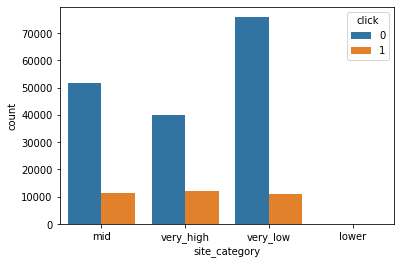

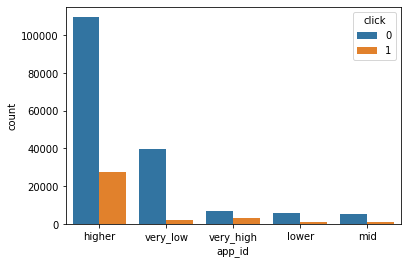

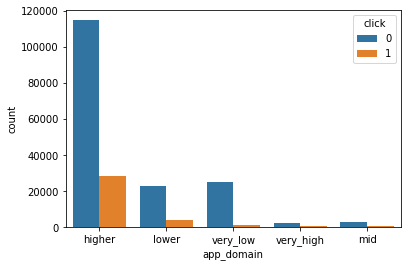

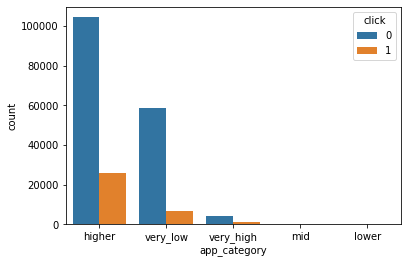

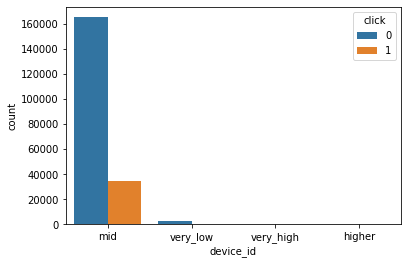

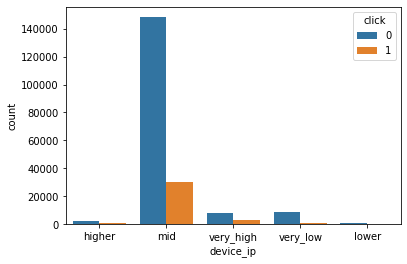

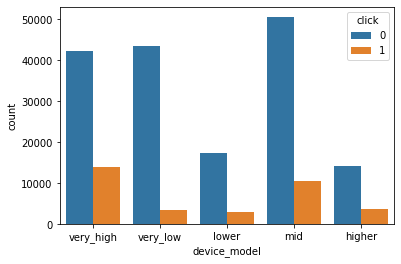

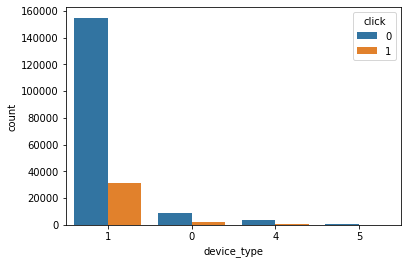

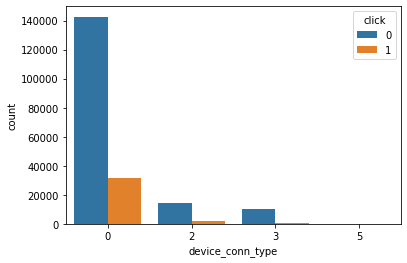

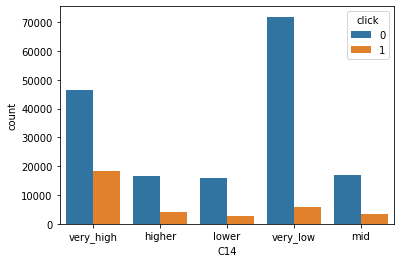

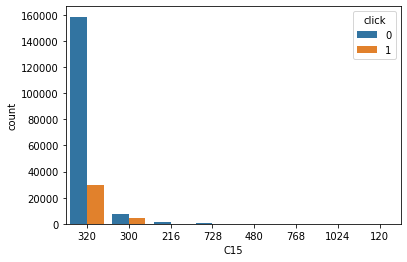

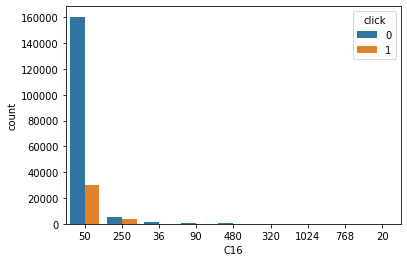

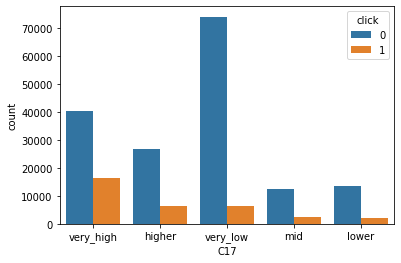

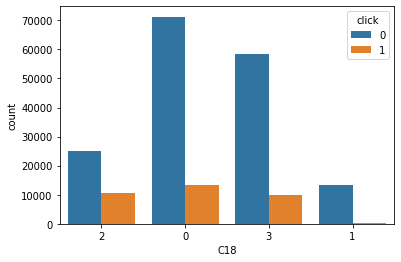

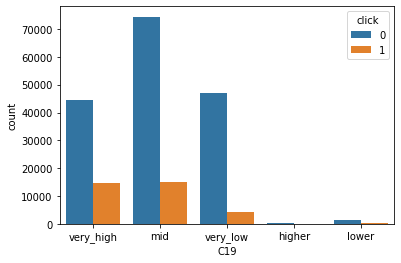

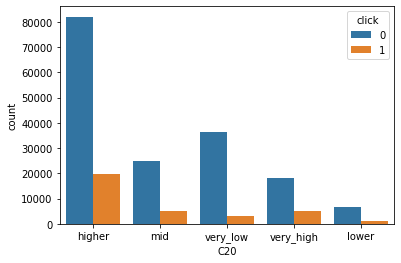

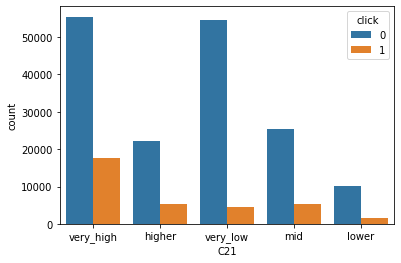

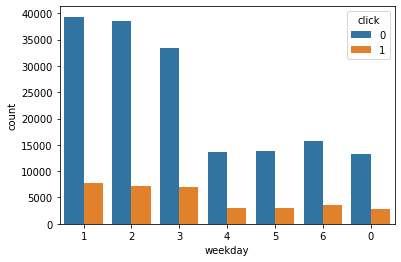

In [ ]:
# Plot bar plots by feature on click counts
for col in df.columns:
    sns.countplot(x = col, hue = "click", data = df)
    plt.show()

According to the charts listed above, it is obvious that these features ['C1', 'device_id', 'C15', 'C16'] is extremely imbalanced, which is meaningless for the prediction model, so these features are removed from the data set.

In [ ]:
df.drop(['C1', 'device_id', 'C15', 'C16'], axis=1, inplace=True)

## Output processed dataset

In [ ]:
#Export the processed train and test data sets to avoid lengthy processing time each time.
df.to_csv('new_data.csv', index=False)

In [ ]:
#Read the processed train, test datasets, skip the lengthy re-execution processing time.
df = pd.read_csv('new_data.csv')
df

,click,hour,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_ip,device_model,device_type,device_conn_type,C14,C17,C18,C19,C20,C21,weekday
0,1,01-03,1,very_high,very_high,mid,higher,higher,higher,higher,very_high,1,0,very_high,very_high,2,very_high,higher,very_high,1
1,0,01-03,0,higher,higher,very_high,higher,higher,higher,mid,very_high,1,0,higher,higher,0,mid,higher,higher,1
2,0,01-03,0,higher,higher,very_high,higher,higher,higher,mid,very_low,1,0,higher,higher,0,mid,higher,higher,1
3,0,03-05,1,very_low,very_low,mid,higher,higher,higher,mid,lower,1,0,lower,very_low,3,mid,mid,very_high,1
4,0,01-03,0,higher,higher,very_high,higher,higher,higher,mid,very_high,1,0,very_high,higher,0,mid,higher,higher,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202140,0,23-01,0,very_low,very_low,very_low,very_high,lower,very_high,mid,mid,1,0,higher,very_high,0,mid,higher,mid,3
202141,0,23-01,0,very_low,very_low,very_low,very_low,lower,very_low,mid,very_low,1,2,mid,lower,0,very_low,very_low,mid,3
202142,0,19-21,0,very_low,very_low,mid,higher,higher,higher,mid,mid,1,0,very_low,very_low,3,mid,higher,very_low,3
202143,0,21-23,0,very_low,very_low,mid,higher,higher,higher,mid,lower,1,0,mid,very_low,0,very_low,lower,very_low,3


In [ ]:
X_col = list(set(df.columns) - set(['click']))
y_col = ['click']

### Split data into Train & Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[X_col], df['click'], test_size=0.3, random_state=1)

### Handle Imbalance Data

As we can see from the graph our label "click" is highly imbalance. Since we have a huge amount of data, we decide to undersample to make it more balance.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler(random_state=0)
#rus.fit(X_train, y_train)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
X_train_resampled

,C18,C14,C19,C17,hour,site_domain,app_id,app_domain,banner_pos,app_category,weekday,site_id,device_conn_type,site_category,C20,device_model,C21,device_type,device_ip
0,3,lower,very_high,lower,15-17,very_low,lower,lower,0,very_low,3,very_low,0,very_low,higher,mid,very_high,1,mid
1,0,very_low,very_low,very_low,17-19,very_low,higher,higher,1,higher,5,very_low,0,mid,higher,lower,lower,1,mid
2,3,very_low,very_low,very_low,15-17,very_low,higher,higher,0,higher,1,very_low,2,mid,very_low,very_low,very_low,1,mid
3,1,very_low,very_low,very_low,11-13,very_low,very_low,very_low,0,very_low,1,very_low,3,very_low,very_low,very_low,very_low,1,mid
4,1,very_low,very_low,very_low,17-19,very_low,very_low,lower,0,very_low,1,very_low,0,very_low,higher,higher,very_low,1,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48259,0,very_high,very_low,very_low,07-09,very_low,very_high,very_high,0,very_low,3,very_low,2,very_low,higher,very_high,very_low,1,mid
48260,0,higher,mid,very_high,15-17,very_low,very_high,lower,0,very_high,3,very_low,0,very_low,higher,lower,mid,1,mid
48261,0,very_high,mid,very_high,07-09,higher,higher,higher,0,higher,3,higher,0,very_high,very_high,higher,mid,1,mid
48262,2,very_high,mid,very_high,15-17,very_high,higher,higher,1,higher,1,very_high,0,mid,higher,very_high,very_high,1,mid


### Hot Encoding

Since our data is categorical, we will have to transform our data using one hot encoding

In [ ]:
# One-hot encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(X_train_resampled)


OneHotEncoder(handle_unknown='ignore')

In [ ]:
X_train_resample_OH = enc.transform(X_train_resampled)
X_test_OH = enc.transform(X_test)

In [ ]:
X_train_resample_OH

<48264x102 sparse matrix of type '<class 'numpy.float64'>'
	with 917016 stored elements in Compressed Sparse Row format>

# **Section 2: Methodology**

In [ ]:
from numpy import loadtxt
import pandas as pd

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

### Main Metrics

Among many metrics to evaluate performance, we choose to focus on Accuracy, Recall/TPR, and Precision/postive predictive value.

1. Accuracy evaluates the general performance of a model. The higher is the better, but it is not what we mainly focus on.

2. Recall/TPR is our primary metric, which is TP/(TP+FN), representing the ratio of people we predict to click and people who actually click the ads. Our goal is to increase TPR, which means we do not want to lose potential customers (less FN is better).

3. Precision/postive predictive value (PPV) is another metric we care about, which is TP/(TP+FP). We prefer a bigger PPV because of budget constraints. Based on the prediction, we would like to advertise to people who are predicted to click the ads. However, if many of them are not going to click the ads, we will waste a lot of money on them!

Therefore, our ultimate goal is to find a model which has higher accuracy, TPR, and PPV.

In [ ]:
baseline_precision = np.mean(y_test)
baseline_precision

0.17014049205197546

In our test set, we have 17% people click the ads. So 17% will be our baseline precision, and we will use 3 algorithms to improve our prediction.

#### Decision Tree

First, we want to use a baseline model to classify our sample. We choose a basic decision tree to train our data and let's see its performance.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train_resample_OH, y_train_resampled)

DecisionTreeClassifier(random_state=0)

In [ ]:
dt_pred = tree1.predict(X_test_OH)

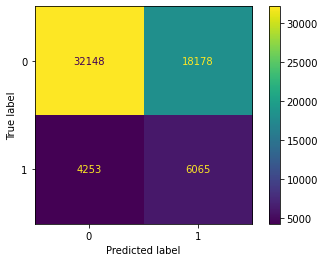

In [ ]:
# Plot confusion metrix
cm = confusion_matrix(y_test, dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print("Accuracy for decision tree: ",accuracy_score(y_test,dt_pred))
print("Recall/TPR for decision tree: ",metrics.recall_score(y_test,dt_pred))
print("Precision/postive predictive value for decision tree: ",metrics.precision_score(y_test,dt_pred))

Accuracy for decision tree:  0.6301200448519227
Recall/TPR for decision tree:  0.5878077146733863
Precision/postive predictive value for decision tree:  0.250175308336427


The basic decision tree's performance is not bad, but we still want to improve it.


We decide to use grid search to jointly adjust the three parameters of decision tree, which are max_depth, min_samples_split and min_samples_leaf in a small range to determine the final parameters.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, cross_val_score
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=42)
param_grid = {
    'max_depth': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 8),
    'min_samples_split': np.arange(2, 10)}

clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
tree2 = GridSearchCV(clf, param_grid, cv=cv)
tree2.fit(X_train_resample_OH, y_train_resampled)
print(tree2.best_params_)
print(tree2.best_score_)

In [ ]:
tree2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=6, min_samples_split=2, random_state=42)
tree2.fit(X_train_resample_OH, y_train_resampled)
dt_pred2 = tree2.predict(X_test_OH)

In [ ]:
import pickle
# save model
pickle.dump(tree2, open("tree2.pickle.dat", "wb"))

In [ ]:
# load model
tree2 = pickle.load(open("tree2.pickle.dat", "rb"))
dt_pred2 = tree2.predict(X_test_OH)

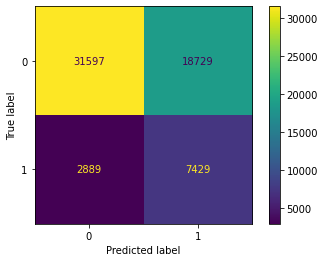

In [ ]:
# Plot confusion metrix
cm = confusion_matrix(y_test, dt_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print("Accuracy for improved decision tree2: ",accuracy_score(y_test,dt_pred2))
print("Recall/TPR for improved decision tree2: ",metrics.recall_score(y_test,dt_pred2))
print("Precision/postive predictive value for improved decision tree2: ",metrics.precision_score(y_test,dt_pred2))

Accuracy for improved decision tree2:  0.6435261526284546
Recall/TPR for improved decision tree2:  0.7200038767202946
Precision/postive predictive value for improved decision tree2:  0.28400489334046947


For the improved decision tree, all the 3 metrics increse, especially the TPR (from 59% to 72%)! This tree looks good, but we still want to try some other methods.


The second method we want to use is random forest.

#### Random Forest

In [ ]:
rfc=RandomForestClassifier(random_state=0)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 60, num = 20)]

# Number of features to consider at every split
#max_features = ['auto', 'sqrt', 'log2']
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 5)]
max_depth.append(None)

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True]

param_grid = { 
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth' : max_depth,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap' : bootstrap,
    'criterion' :['gini']
    #'criterion' :['gini', 'entropy']
}

In [ ]:
# use grid search to choose best parameters
rfc_CV = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3, verbose=10, n_jobs = -1)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'max_depth': [10, 12, 15, 17, 20, None],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [10, 12, 15, 17, 20, 23, 25, 28, 31,
                                          33, 36, 38, 41, 44, 46, 49, 52, 54,
                                          57, 60]},
             verbose=10)

In [ ]:
# get the best performace hyperparameter set
rfc_CV.best_score_, rfc_CV.best_estimator_, rfc_CV.best_params_

(0.6879454666003646,
 RandomForestClassifier(max_depth=12, min_samples_leaf=2, n_estimators=49,
                        random_state=0),
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 12,
  'max_features': 'auto',
  'min_samples_leaf': 2,
  'n_estimators': 49})

We can see that the best estimator is : RandomForestClassifier(max_depth=12, min_samples_leaf=2, n_estimators=49, random_state=0). Now we will use them to build a random forest model.

In [ ]:
rfc = RandomForestClassifier(bootstrap = 'True',criterion = 'gini',max_depth=12, min_samples_leaf=2, n_estimators=49,random_state=0)
rfc.fit(X_train_resample_OH, y_train_resampled)

RandomForestClassifier(bootstrap='True', max_depth=12, min_samples_leaf=2,
                       n_estimators=49, random_state=0)

In [ ]:
import pickle
# save model
pickle.dump(rfc, open("rfc.pickle.dat", "wb"))

In [ ]:
# load model
rfc = pickle.load(open("rfc.pickle.dat", "rb"))

In [ ]:
rf_pred = rfc.predict(X_test_OH)

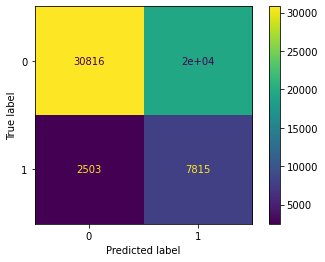

In [ ]:
# Plot confusion metrix
cm = confusion_matrix(y_test, rf_pred, labels=rfc_CV.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc_CV.classes_)
disp.plot()

In [ ]:
print("Accuracy for random forest on CV data: ",accuracy_score(y_test,rf_pred))
print("Recall/TPR for random forest on CV data: ",metrics.recall_score(y_test,rf_pred))
print("Precision/postive predictive value for random forest on CV data: ",metrics.precision_score(y_test,rf_pred))

Accuracy for random forest on CV data:  0.6370127300310006
Recall/TPR for random forest on CV data:  0.7574142275634813
Precision/postive predictive value for random forest on CV data:  0.2860018298261665


Compared to decision tree, random forest has higher recall, but the other two metrics do not change.

#### XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
param = {'max_depth': 3,
         'learning_rate': 0.01,
         'objective': 'binary:logistic',
         "eval_metric":"auc",
         "scale_pos_weight":10,
         "subsample":0.8,
         "min_child_weight":1,
          }

In [ ]:
dtrain = xgb.DMatrix(X_train_resample_OH,label=y_train_resampled)
dtest  = xgb.DMatrix(X_test_OH)

In [ ]:
cv_res= xgb.cv(param,dtrain,num_boost_round=2000,early_stopping_rounds=30,nfold=10, metrics='auc')

In [ ]:
print(cv_res)

      train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0           0.706366       0.004526       0.705277      0.006824
1           0.709349       0.007966       0.708186      0.008968
2           0.712232       0.008425       0.711678      0.009853
3           0.712283       0.008386       0.711751      0.009739
4           0.713763       0.007651       0.712924      0.009610
...              ...            ...            ...           ...
1995        0.759465       0.000320       0.750039      0.001755
1996        0.759472       0.000321       0.750043      0.001755
1997        0.759475       0.000320       0.750045      0.001753
1998        0.759481       0.000318       0.750045      0.001753
1999        0.759486       0.000319       0.750048      0.001755

[2000 rows x 4 columns]


In [ ]:
#cv_res.shape[0] is the optimal number of iterations
cv_res.shape[0]

2000

In [ ]:
xgb = xgb.train(param,dtrain,num_boost_round=cv_res.shape[0])

In [ ]:
import pickle
# save model
pickle.dump(xgb, open("xgb.pickle.dat", "wb"))

In [ ]:
# use pickle load model
xgb = pickle.load(open("xgb.pickle.dat", "rb"))
y_pre = xgb.predict(dtest)

The mean value of predicted CTR is 0.83, and the frequency distribution is like the graph below. So we decide to use 0.86 as the threshold to divide the predict value in to 0/1.

In [ ]:
np.mean(y_pre)

0.83399874

<AxesSubplot:ylabel='Density'>

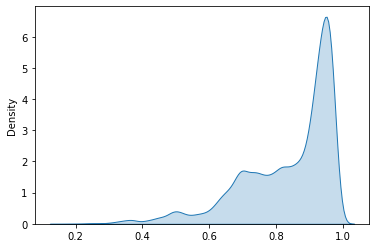

In [ ]:
sns.kdeplot(y_pre, shade=True)

In [ ]:
xgb_pred = (y_pre >= 0.86)*1
print("Accuracy for XGBoost on CV data: ",accuracy_score(y_test,xgb_pred))
print("Recall/TPR for XGBoost on CV data: ",metrics.recall_score(y_test,xgb_pred))
print("Precision/postive predictive value for XGBoost on CV data: ",metrics.precision_score(y_test,xgb_pred))

Accuracy for XGBoost on CV data:  0.5629081195171822
Recall/TPR for XGBoost on CV data:  0.8456096142663306
Precision/postive predictive value for XGBoost on CV data:  0.25937156276940454


array([[25412, 24914],
       [ 1593,  8725]])

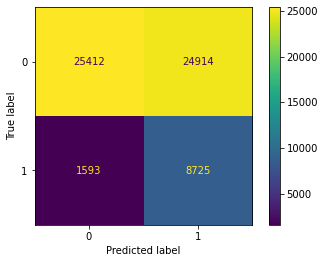

In [ ]:
cm = confusion_matrix(y_test, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
cm

XGBoost acheives the highest recall, but its precision is not good as random forest.

### Model selection

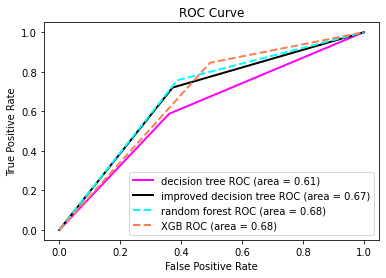

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import auc

#decision tree
#plt.subplot(2,2,1) 
fpr, tpr, thersholds = roc_curve(y_test, dt_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='decision tree ROC (area = {0:.2f})'.format(roc_auc), lw=2, color='magenta')

#improved decision tree
#plt.subplot(2,2,2) 
fpr, tpr, thersholds = roc_curve(y_test, dt_pred2, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='improved decision tree ROC (area = {0:.2f})'.format(roc_auc), lw=2, color='black')

#random forest
#plt.subplot(2,2,3) 
fpr, tpr, thersholds = roc_curve(y_test, rf_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, '--', label='random forest ROC (area = {0:.2f})'.format(roc_auc), lw=2, color='cyan')

#XGB
#plt.subplot(2,2,3) 
fpr, tpr, thersholds = roc_curve(y_test, xgb_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, '--', label='XGB ROC (area = {0:.2f})'.format(roc_auc), lw=2, color='coral')

# Set the upper and lower limits of the x and y axes to avoid overlapping with the edge and better observe the overall image
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()


Based on the ROC curve, we can see that the random forest and XGBoost perform better than decision trees (larger AUC). But we can not decide which to use, we still need to look at 3 metrics we most care about.

In [ ]:
result = pd.DataFrame(columns=['Accuracy', 'Recall/TPR', 'Precision/postive predictive value'], 
                      index=["decision tree", "improved decision tree", "random forest","XGBoost"],
                      data = [[accuracy_score(y_test,dt_pred),metrics.recall_score(y_test,dt_pred),metrics.precision_score(y_test,dt_pred)],
                              [accuracy_score(y_test,dt_pred2),metrics.recall_score(y_test,dt_pred2),metrics.precision_score(y_test,dt_pred2)],
                              [accuracy_score(y_test,rf_pred),metrics.recall_score(y_test,rf_pred),metrics.precision_score(y_test,rf_pred)],
                             [accuracy_score(y_test,xgb_pred),metrics.recall_score(y_test,xgb_pred),metrics.precision_score(y_test,xgb_pred)]]
                       )
  
result

,Accuracy,Recall/TPR,Precision/postive predictive value
decision tree,0.630120,0.587808,0.250175
improved decision tree,0.643526,0.720004,0.284005
random forest,0.637013,0.757414,0.286002
XGBoost,0.562908,0.845610,0.259372


We choose XGBoost, since its recall is the higher than random forest by 9%, and its precision is only lower than random forest by a little.